# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:10px 10px;">Sentiment Analysis using NLP and Supervised Machine Learning Models</p>

<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Table of Contents
    
#### Introduction
#### Exploratory Data Analysis
#### Train | Test Split
#### Vectorization
#### Model Comparisons:
**1. Naive Bayes**

**2. Logistic Regression**

**3. SVC / Linear SVC**
#### Performance Evaluation
#### Finalizing a PipeLine for Deployment on New Tweets
</div>

<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">Introduction

###  Tweets Data on Airline Companies in the US

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally come from Crowdflower's Data for Everyone library.

This is a **sentiment analysis study** about the issues of every major airline in the US. **Twitter data** was scraped from February of 2015 and contributors were asked to first classify **positive**, **negative**, and **neutral tweets**, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Classificaiton of the Texts

Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. So, based on this sentiment analysis, in the future we can use such an algorithm to automatically read and flag tweets im a customer service agent at an airline company to reach out customers.
</span>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("airline_tweets.csv")

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

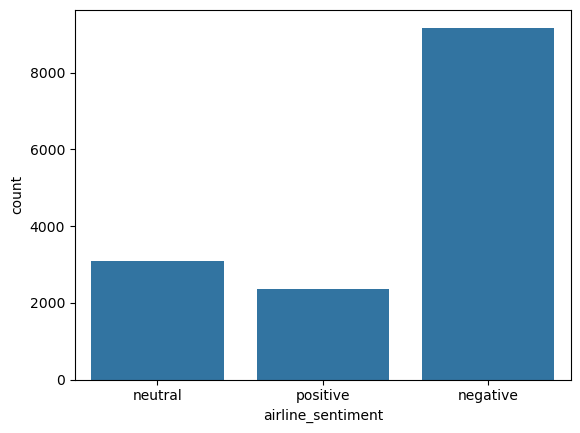

In [12]:
sns.countplot(df, x="airline_sentiment")

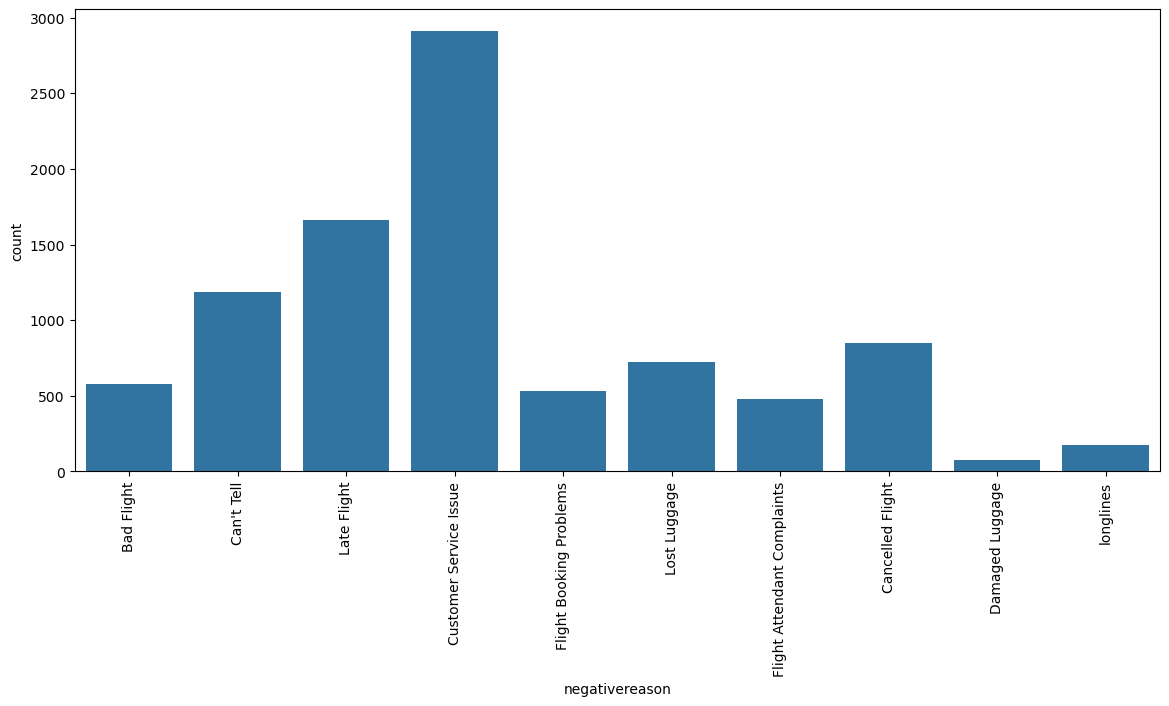

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(df, x="negativereason")
plt.xticks(rotation=90);

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** Among the 10 negative reasons, the most popular one is "Customer Service Issue" followed by "Late Flight" and "Can't Tell". 
</span>

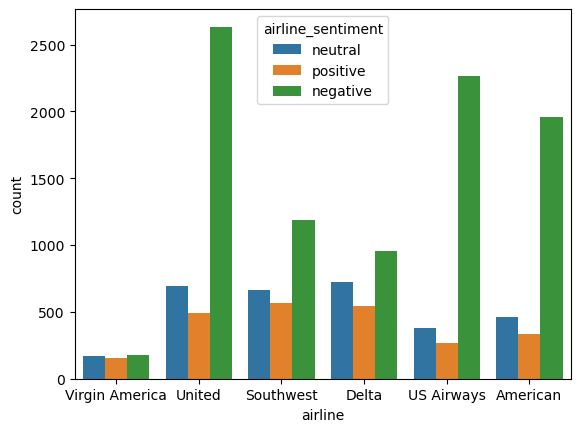

In [22]:
sns.countplot(df, x="airline", hue="airline_sentiment");

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 
    
**Insight:** Among the companies, "United" has the most negaiteve reviews followed by "US Airways" and "American". On the other hand, Virgin America has the least negative reviews. Additionally, the number of the negative and positive reviews about Virgin America is very close to each other. 
</span>

### Features amd Labels

**For setiment analysis, let's focus on sentiment labels and texts.**

In [24]:
data = df[["airline_sentiment", "text"]]
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [26]:
X = data["text"]

In [27]:
y = data["airline_sentiment"]

## Train | Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words ="english")

In [36]:
# Fit X_train
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [ ]:
# Transform X_train and X_test

In [37]:
X_train_tfidf= tfidf.transform(X_train)

In [38]:
X_test_tfidf= tfidf.transform(X_test)

In [39]:
# See the transformed X_train matrix (only info)
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**NOTE:** Do not use ".todense()" for such a large sparse matrix!!!

## Model Comparisons: Naive Bayes, Logistic Regression, Support Vector Machines

### 1. Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

### 2. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000) # determine a high "max_iter" not to get warning
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

### 3. SVC and Linear SVC

In [45]:
from sklearn.svm import SVC, LinearSVC
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

## Performance Evaluation

In [48]:
# For classification report
from sklearn.metrics import classification_report

# To display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay 

In [50]:
# Create a fucntion to evaluate above models

def report(model):
    preds = model.predict(X_test_tfidf) # predictions
    print(classification_report(y_test,preds)) # see the classification report
    ConfusionMatrixDisplay.from_predictions(y_test, preds); # plot confusion matrix    

#### For Naive Bayes Model

Naive Bayes Model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



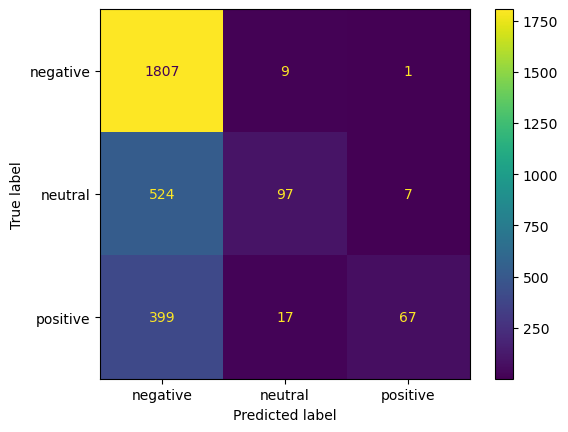

In [59]:
print("Naive Bayes Model")
report(nb)

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98"> Conclusion:
We focus on the negative reviews in terms of scores and misclassifications. In the Naive Bayes model, 10 negative reviews were misclassified as neutral (9) and positive (1). Precision, Recall, and F1-score for this class are "0.66", "0.99", and "0.79", respectively. However, we need to keep in mind that the model is not successful in predicting other categories. One possible reason is that the data in the negative category is more than neutral and positive ones. Since the data is not balanced, these relatively high scores can be misleading. 
</span>

#### For Logistic Regression Model

Logistic Regression Model
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



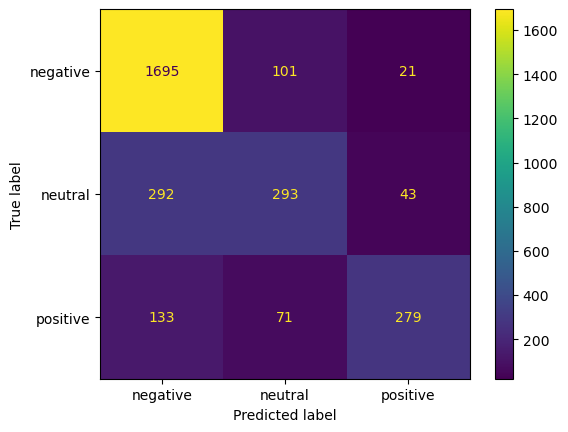

In [58]:
print("Logistic Regression Model")
report(log)

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98"> Conclusion: 
The overall accuracy score in the Logistic Regression model (0.77) is higher than the Naive Bayes model (0.67). It is well-balanced in the prediction of neutral and positive categories. The F1 score for negative reviews is "0.86", higher than the Naive Bayes model. Unlike the Naive Bayes model, the Logistic Regression model missed more negative reviews (122 misclassifications).
</span>

#### For SVC and Linear SVC Models

SVC Model
              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



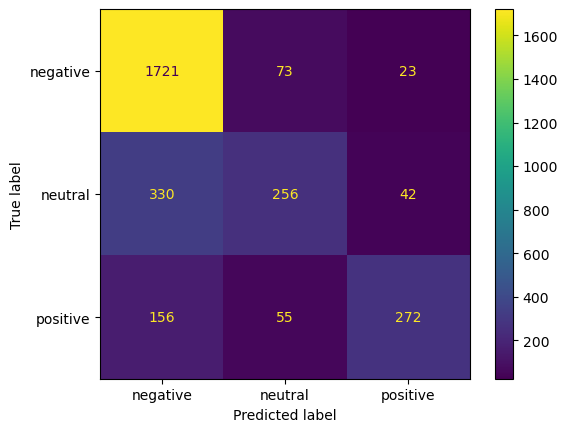

In [60]:
print('SVC Model')
report(rbf_svc)

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98"> Conclusion:
The accuracy score in the SVC model is the same as that of the Logistic Regression model. Also, other scores are very close to that of the Logistic Regression model. Although the SVC model is better at predicting negative reviews, the Logistic Regression model overwhelms the predictions of the neutral and positive reviews.
</span>

Linear SVC Model
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



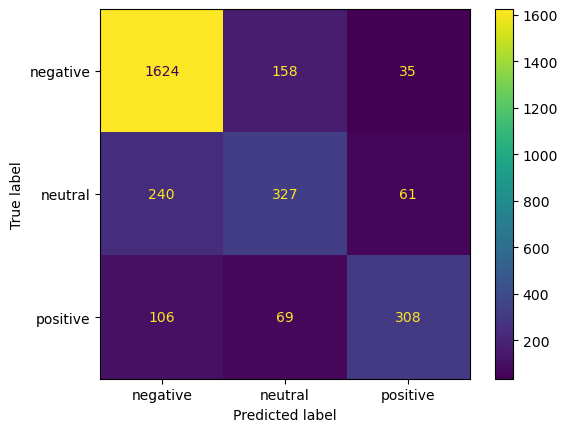

In [61]:
print('Linear SVC Model')
report(linear_svc)

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98"> Conclusion: 
Compared to the SVC model, the Linear SVC model has more misclassified negative reviews. But it is better at predicting neutral and positive reviews. Both models reached the same accuracy score (0.77). Also, in both models, the F1 score for the negative reviews is the same (0.86). Alternatively, we can try different hyperparameters in these models to reach higher scores or we can use tree-based models, such as Random Forests or Boosting models.
</span>

## Finalizing a PipeLine for Deployment on New Tweets
If we are satisfied with a model's performance, we can set up a pipeline that can take in a tweet directly. 

Let's say, we want to deploy Linear SVC model...

In [62]:
from sklearn.pipeline import Pipeline

In [65]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('svc',LinearSVC())])

# This pipeline will vectorize and use SVC model directly for us

In [66]:
# Then, fit the entire dataset
pipe.fit(X,y)

# Alternative coding of X and y
# pipe.fit(df['text'],df['airline_sentiment']) 

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

#### Prediction (Classification) of New Tweets

In [67]:
# Let' predict this tweet:"good flight"
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

The model predictied it as positive review.

In [68]:
# Another new tweet

new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [69]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)